<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

# 1. Naive Bayes

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TR_BI/Data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# convart from string to number
df['label'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else (1 if x == 'Iris-versicolor' else 2))
df.set_index('Id', inplace=True )
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2


## 독립변수(X)와 종속변수(y)

In [ ]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'label']
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'label']

### 학습(Train) 데이터와 검증(Test) 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df[cols].drop(['label'], axis=1), df.label, test_size = 0.25)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
gnb = GaussianNB().fit(train_X, train_y).predict(test_X)
gnb
#gnb.argmax(axis=1)

array([1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_y, gnb)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 13]])

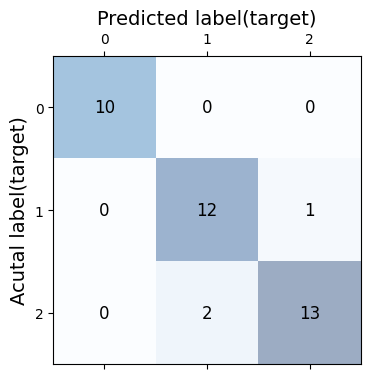

In [ ]:
con_m = confusion_matrix(test_y, gnb, normalize=None)  # normalize=c('true','pred','all'), None

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

### Accuracy TP + TN / TP + FP + FN + TN

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy:{:.4f}".format(accuracy_score(test_y, gnb)))

Accuracy:0.9211


# NaiveBayes 적용 사례 2

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Cust_ID     30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_0       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [ ]:
# predicators(feature) & target(label)
features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']
label = ['default_YN']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[label], test_size=0.25 )
X_train
#y_train
#X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
14848,130000,1,2,2,27,0,0,0,116646,113851,110317,5578,4000,3863
9731,160000,2,2,2,25,2,2,2,158629,162097,163567,7500,5600,5822
12627,340000,2,2,2,32,-2,-2,-2,0,0,2500,0,5000,0
15011,50000,1,2,1,34,1,2,0,49372,47420,47992,0,2500,3500
29399,230000,1,2,2,28,-2,-2,-2,-73,-73,-73,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20317,170000,2,3,2,56,-1,-1,-1,390,17450,13366,17450,13366,20894
10902,30000,2,2,2,31,0,0,0,28716,26570,26829,2000,1600,1000
4786,100000,2,2,2,56,0,0,2,97549,102864,98969,9300,0,2500
14344,230000,2,2,1,42,0,0,0,5838,6369,6790,1300,1200,2000


In [ ]:
gnb_pred_val = GaussianNB().fit(X_train, y_train).predict(X_test)
gnb_pred_val

gnb_pred_prob = GaussianNB().fit(X_train, y_train).predict_proba(X_test)
gnb_pred_prob

#gnb_pred_prob.argmax(axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.44324353, 0.55675647],
       [0.43221574, 0.56778426],
       [0.94218577, 0.05781423],
       ...,
       [0.50197481, 0.49802519],
       [0.60449968, 0.39550032],
       [0.45808146, 0.54191854]])

In [ ]:
from sklearn.metrics import confusion_matrix

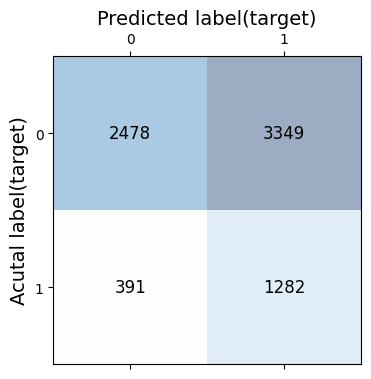

In [ ]:
con_m = confusion_matrix(y_test, gnb_pred_val, normalize=None)  # normalize=c('true','pred','all'), None

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
# Baseline setting
ns_probs = [0 for _ in range(len(X_test))]
ns_fpr,ns_tpr,_= roc_curve(y_test, ns_probs)

In [ ]:
mdl_fpr,mdl_tpr,threshold=roc_curve(y_test, gnb_pred_prob[:,1])

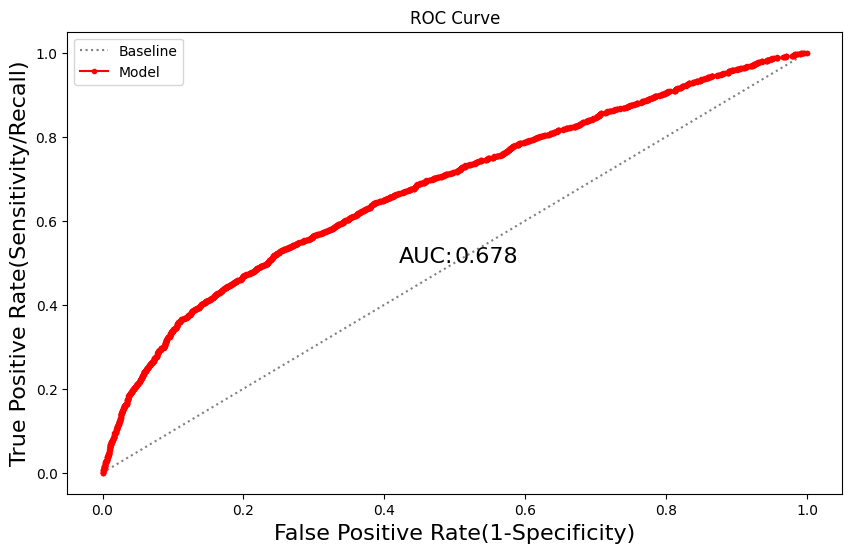

In [ ]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(ns_fpr, ns_tpr,linestyle=':',color='gray', label='Baseline')
plt.plot(mdl_fpr, mdl_tpr,marker='.', color='red',label='Model')

plt.text(0.5, 0.5, np.round(roc_auc_score(y_test, gnb_pred_prob[:,1]),3), fontsize=16)
plt.text(0.42, 0.5, "AUC:", fontsize=16)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=16)
plt.ylabel('True Positive Rate(Sensitivity/Recall)', fontsize=16)

plt.legend()
plt.show()